In [81]:
import seaborn.objects as so
import pandas as pd
import escodrinyar as sc

In [82]:
df = pd.read_csv('performance_results.csv')
df

,n_elements,n_archetypes,model,device,time
0,100,5,BiAA,cpu,34.630778
1,100,5,BiAA (gradient-based),cpu,9.560514
2,100,5,BiAA (gradient-based),cuda,16.790794
3,500,5,BiAA,cpu,45.382579
4,500,5,BiAA (gradient-based),cpu,9.486266
...,...,...,...,...,...
66,100000,100,BiAA (gradient-based),cuda,16.475421
67,500000,100,BiAA (gradient-based),cpu,86.219254
68,500000,100,BiAA (gradient-based),cuda,22.340030
69,1000000,100,BiAA (gradient-based),cpu,191.959784


In [83]:

df['n_archetypes'] = (df['n_archetypes'] ** 2).astype(str)
df['model'][df['model'] == 'BiAA'] = 'nnls'
df['model'][df['model'] == 'BiAA (gradient-based)'] = "gradient"
df['model'] = df['model'] + ' - ' + df['device']
df['group'] = df['model'] + df['n_archetypes']
df.columns

C:\Users\aalcacer\AppData\Local\Temp\ipykernel_12652\2605239772.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['model'][df['model'] == 'BiAA'] = 'nnls'
C:\Users\aalcacer\AppData\Local\Temp\ipykernel_12652\2605239772.py:2: SettingWith

Index(['n_elements', 'n_archetypes', 'model', 'device', 'time', 'group'], dtype='object')

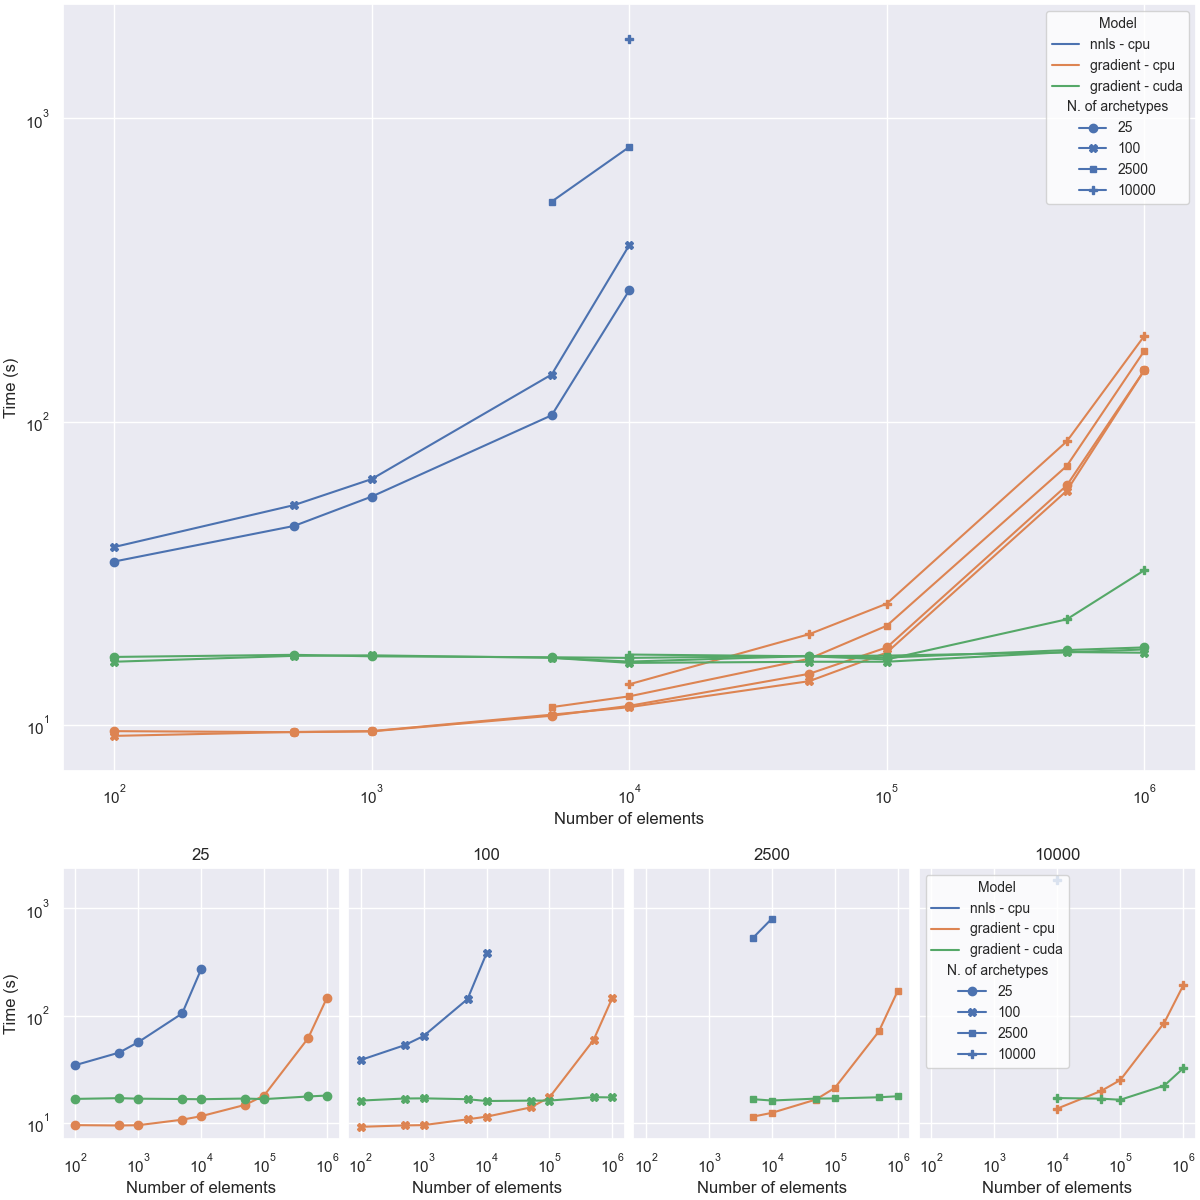

In [88]:
# activate matplotlib style

gfig = (
    sc.Plot(data=df, x='n_elements', y='time', color='model', group='group')
    .add(so.Line(), marker='n_archetypes')
    .scale(x='log', y='log')
    .label(x='Number of elements', y='Time (s)', color='Model', marker='N. of archetypes')
)

(
    gfig | gfig.facet('n_archetypes')
).opts(
    figsize=(12, 12),
    height_ratios=[7, 3]
)

In [85]:
df

,n_elements,n_archetypes,model,device,time,group
0,100,25,nnls - cpu,cpu,34.630778,nnls - cpu25
1,100,25,gradient - cpu,cpu,9.560514,gradient - cpu25
2,100,25,gradient - cuda,cuda,16.790794,gradient - cuda25
3,500,25,nnls - cpu,cpu,45.382579,nnls - cpu25
4,500,25,gradient - cpu,cpu,9.486266,gradient - cpu25
...,...,...,...,...,...,...
66,100000,10000,gradient - cuda,cuda,16.475421,gradient - cuda10000
67,500000,10000,gradient - cpu,cpu,86.219254,gradient - cpu10000
68,500000,10000,gradient - cuda,cuda,22.340030,gradient - cuda10000
69,1000000,10000,gradient - cpu,cpu,191.959784,gradient - cpu10000
